<a href="https://colab.research.google.com/github/binodpun/Data-Science-with-python/blob/main/logistic_regression_ds1100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


About Dataset
**New to machine learning and data science? No question is too basic or too simple. Use this place to post any first-timer clarifying questions for the classification algorithm or related to datasets**
!This file contains demographics about customer and whether that customer clicked the ad or not . You this file to use classification algorithm to predict on the basis of demographics of customer as independent variable
This data set contains the following features:
This data set contains the following features:
* 'User ID': unique identification for consumer
* 'Age': cutomer age in years
* 'Estimated Salary': Avg. Income of consumer
* 'Gender': Whether consumer was male or female
* 'Purchased': 0 or 1 indicated clicking on Ad

In [3]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.describe(include=object)

,Gender
count,400
unique,2
top,Female
freq,204


In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


EDA

<Axes: xlabel='Gender', ylabel='count'>

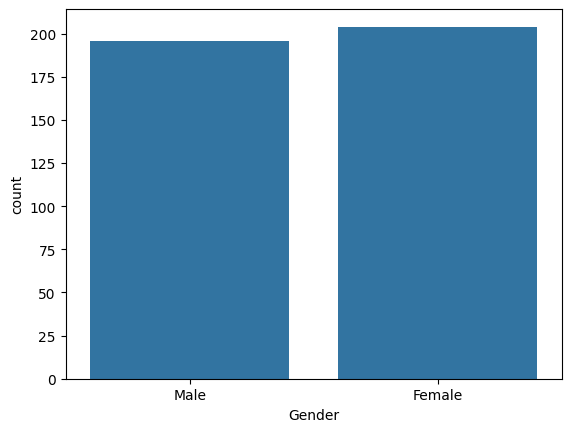

In [9]:
import seaborn as sns
sns.countplot(x=df['Gender'])# no. of male and no. of female is nearly equal

<Axes: ylabel='Age'>

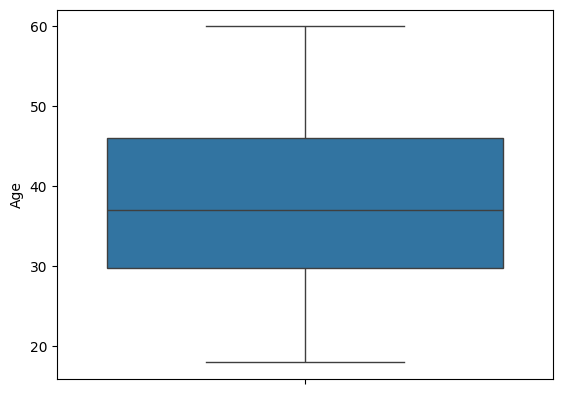

In [10]:
sns.boxplot(df['Age'])# no outliers in Age column

<Axes: xlabel='Age', ylabel='Count'>

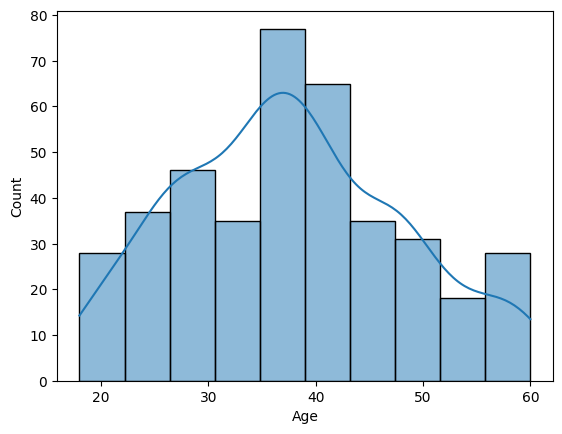

In [11]:
sns.histplot(df['Age'],kde=True)

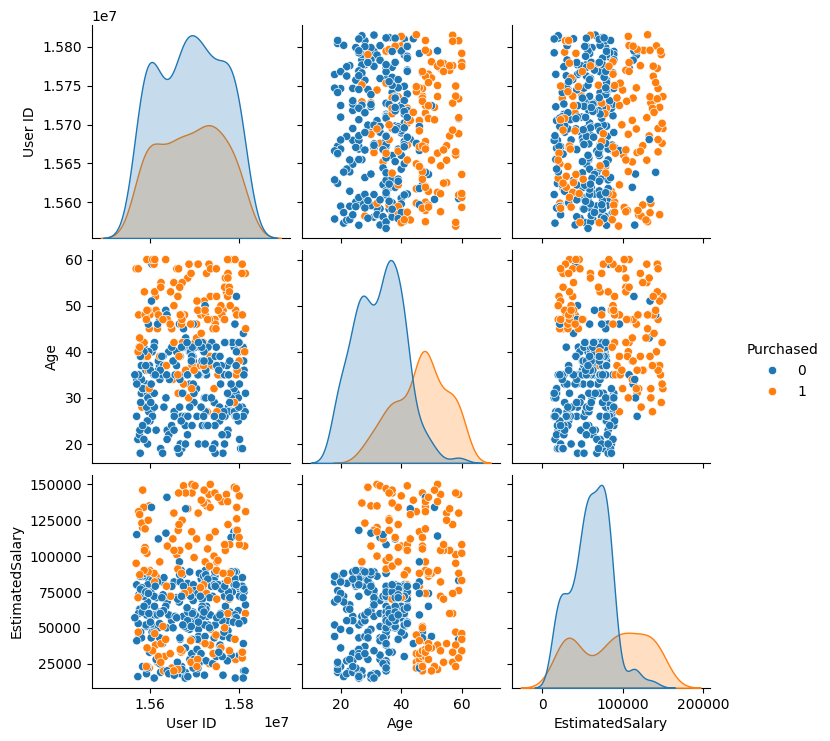

In [12]:
sns.pairplot(df, hue='Purchased')

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

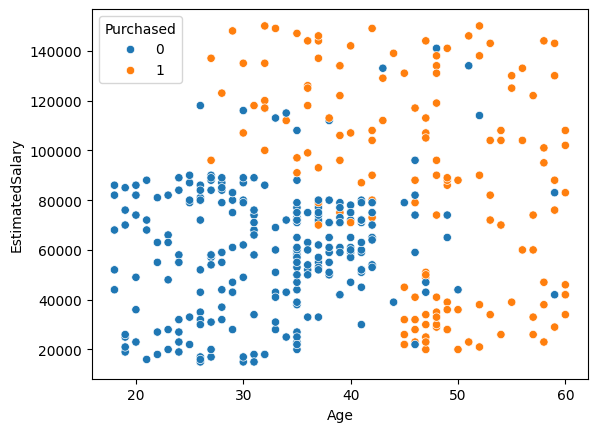

In [13]:
sns.scatterplot(x=df['Age'], y=df['EstimatedSalary'], hue = df['Purchased'])

In [15]:
X = df.loc[:, ['Age', 'EstimatedSalary']]
y= df.Purchased # classification problem because df.Purchased is categorial column with binary data

In [16]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

Train test split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


# Machine Learning Model

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=40)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluation

In [30]:
accuracy = model.score(X_test, y_test)
accuracy

0.7

In [31]:
# confusion matrix, precision, recall, f1-core